<a href="https://colab.research.google.com/github/youssy99/Pytorch-Learning/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [45]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
  # Input layer (4 features of the flowers) -->
  # Hidden layer1 (number of neurons) -->
  # H2(n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [46]:
# Pick a manual seed for randomization
torch.manual_seed(99)
# Create an instance of model
model = Model()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
dataFrame = pd.read_csv(url)

In [49]:
dataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
# Change last column from strings to integers
dataFrame['species'] = dataFrame['species'].replace('setosa', 0.0)
dataFrame['species'] = dataFrame['species'].replace('versicolor', 1.0)
dataFrame['species'] = dataFrame['species'].replace('virginica', 2.0)
dataFrame

/tmp/ipython-input-2294138454.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['species'] = dataFrame['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [51]:
# Train Test Split set x, y and convert to numpy arrays
x = dataFrame.drop('species', axis=1).values
y = dataFrame['species'].values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [54]:
# Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [55]:
# Convert y features to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [56]:
# Set the criterion of model to measure the error, how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, lr
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [57]:
# Train model
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train) # Get predicted results
  loss = criterion(y_pred, y_train) # Measure the error, predicted values vs the y_train
  losses.append(loss.detach().numpy()) # Keep track of our losses
  print(f"Epoch: {i} and loss: {loss}")

  # Do some back propagation: take the error rate and forward propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.0892452001571655
Epoch: 1 and loss: 1.018967628479004
Epoch: 2 and loss: 0.9806132912635803
Epoch: 3 and loss: 0.9564445614814758
Epoch: 4 and loss: 0.9258449673652649
Epoch: 5 and loss: 0.890844464302063
Epoch: 6 and loss: 0.8545817136764526
Epoch: 7 and loss: 0.818981409072876
Epoch: 8 and loss: 0.7846264243125916
Epoch: 9 and loss: 0.7490628361701965
Epoch: 10 and loss: 0.7118548154830933
Epoch: 11 and loss: 0.6752229928970337
Epoch: 12 and loss: 0.6418729424476624
Epoch: 13 and loss: 0.6110231280326843
Epoch: 14 and loss: 0.5800751447677612
Epoch: 15 and loss: 0.5500413179397583
Epoch: 16 and loss: 0.5224109888076782
Epoch: 17 and loss: 0.4974055290222168
Epoch: 18 and loss: 0.4735284745693207
Epoch: 19 and loss: 0.45014867186546326
Epoch: 20 and loss: 0.42835381627082825
Epoch: 21 and loss: 0.4091232717037201
Epoch: 22 and loss: 0.39155399799346924
Epoch: 23 and loss: 0.3745761215686798
Epoch: 24 and loss: 0.35787734389305115
Epoch: 25 and loss: 0.341992497444

Text(0.5, 0, 'epoch')

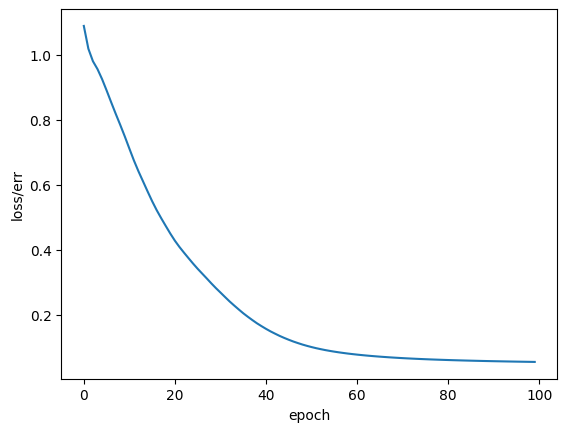

In [58]:
# Graph results
plt.plot(range(epochs), losses)
plt.ylabel("loss/err")
plt.xlabel("epoch")

In [59]:
# Evaluate Model on Test data set
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)
print(f"The loss is: {loss}")

The loss is: 0.06526999920606613


In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)
    print(f"{i+1} {str(y_val)} \t {y_test[i]}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f"{correct} out of {len(y_test)} = {100*correct/len(y_test)}%")

In [61]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [62]:
with torch.no_grad():
  print(model(new_iris))


tensor([ 14.5314,   8.3752, -19.3297])


In [64]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-7.2628,  6.2748,  9.7141])


In [66]:
# Save our NN model
torch.save(model.state_dict(), 'iris_model')

In [67]:
# Load the saved model

new_model = Model()
new_model.load_state_dict(torch.load('iris_model'))

<All keys matched successfully>

In [68]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)